# NYC Parking Tickets: An Exploratory Analysis

# Problem Statement

## Objectives of the Case Study

. Primarily, this case study is meant as a deep dive into the usage of Spark. As you saw while working with Spark, its syntax behaves differently from a regular Python syntax. One of the major objectives of this case study is to gain familiarity with how analysis works in PySpark as opposed to base Python.

. Learning the basic idea behind using functions in PySpark can help in using other libraries like SparkR. If you are in a company where R is a primary language, you can easily pick up SparkR syntax and use Spark’s processing power.

. The process of running a model-building command boils down to a few lines of code. While drawing inferences from data, the most time-consuming step is preparing the data up to the point of model building. So, this case study will focus more on exploratory analysis.

# Problem Statement

Big data analytics allows you to analyse data at scale. It has applications in almost every industry in the world. Let’s consider an unconventional application that you wouldn’t ordinarily encounter.

 

New York City is a thriving metropolis. Just like most other metros its size, one of the biggest problems its citizens face is parking. The classic combination of a huge number of cars and cramped geography leads to a huge number of parking tickets.

 

In an attempt to scientifically analyse this phenomenon, the NYC Police Department has collected data for parking tickets. Of these, the data files for multiple years are publicly available on Kaggle. We will try and perform some exploratory analysis on a part of this data. Spark will allow us to analyse the full files at high speeds as opposed to taking a series of random samples that will approximate the population. For the scope of this analysis, we will analyse the parking tickets over the year 2017. 

 

Note: Although the broad goal of any analysis of this type is to have better parking and fewer tickets, we are not looking for recommendations on how to reduce the number of parking tickets—there are no specific points reserved for this.

 

The purpose of this case study is to conduct an exploratory data analysis that will help you understand the data. Since the size of the dataset is large, your queries will take some time to run, and you will need to identify the correct queries quicker. The questions given below will guide your analysis.

 



In [1]:
# importing pyspark session
from pyspark.sql import SparkSession


In [2]:
# importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Name
Spark = SparkSession.builder.appName('NYC Parking Tickets Analysis').getOrCreate()

In [4]:
# importing the data Set

Spark_data = Spark.read.format("csv").option("header", "true").load("/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

In [5]:
# Check Dataframe
Spark_data

DataFrame[Summons Number: string, Plate ID: string, Registration State: string, Issue Date: string, Violation Code: string, Vehicle Body Type: string, Vehicle Make: string, Violation Precinct: string, Issuer Precinct: string, Violation Time: string]

In [6]:
# Show spark data . 
Spark_data.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|

In [7]:
# summary statistics
Spark_data.describe().show()

+-------+--------------------+--------+------------------+----------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|      Summons Number|Plate ID|Registration State|Issue Date|    Violation Code| Vehicle Body Type|      Vehicle Make|Violation Precinct|  Issuer Precinct|   Violation Time|
+-------+--------------------+--------+------------------+----------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|            10803028|10803028|          10803028|  10803028|          10803028|          10803028|          10803028|          10803028|         10803028|         10803028|
|   mean|  6.81744702906579E9|Infinity|              99.0|      null|34.599430455979565|3.9258887134586864| 6519.974025974026| 45.01216260848347|46.82931211508477|909.2857142857143|
| stddev|2.3202339623282275E9|     NaN|               0.0|      null|19.359868716323483|0.

In [8]:
# Check The Schema . 
Spark_data.printSchema()

root
 |-- Summons Number: string (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: string (nullable = true)
 |-- Issuer Precinct: string (nullable = true)
 |-- Violation Time: string (nullable = true)



In [9]:
# Check the no of rows .
Spark_data.count()

10803028

In [10]:
# Check the Length of columns .
len(Spark_data.columns)

10

In [11]:
# Drop Duplicates values if exists. 
Spark_data = Spark_data.dropDuplicates()
Spark_data.count()

10803028

In [12]:
# Drop Null Values if Exist.
Spark_data = Spark_data.dropna()

Spark_data.count()

10803028

In [13]:
# call functions  count, when, lit, col, max, regexp_replace, from_unixtime, isnan, expr, substring,countDistinct, desc from Pyspark .
from pyspark.sql.functions import count, when, lit, col, max, regexp_replace, from_unixtime, isnan, expr, substring,countDistinct, desc

In [14]:

Spark_data = Spark_data.withColumn("Summons_Number", col("Summons Number").cast("Long"))
Spark_data = Spark_data.withColumn("Issue_Date", col("Issue Date").cast("Date"))
Spark_data = Spark_data.withColumn("Violation_Code", col("Violation Code").cast("Int"))
Spark_data = Spark_data.withColumn("Violation_Precinct", col("Violation Precinct").cast("Int"))
Spark_data = Spark_data.withColumn("Issuer_Precinct", col("Issuer Precinct").cast("Int"))

In [15]:
Spark_data.createOrReplaceTempView("Spark_data_Complete_Table")

In [16]:
# After Creating createOrReplaceTempView .
Spark_data = Spark.sql(
    "SELECT \
    `Summons_Number` as `Summons_Number`, \
    `Plate ID` as `Plate_ID`, \
    `Registration State` as `Registration_State`, \
    `Issue_Date` as `Issue_Date`, \
    `Violation_Code` as `Violation_Code`, \
    `Vehicle Body Type` as `Vehicle_Body_Type`, \
    `Vehicle Make` as `Vehicle_Make`, \
    `Violation_Precinct` as `Violation_Precinct`, \
    `Issuer_Precinct` as `Issuer_Precinct`, \
    `Violation Time` as `Violation_Time` \
    FROM Spark_data_Complete_Table"
)
Spark_data.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    4628596529| FFV9629|                NY|2016-12-16|            36|             SUBN|       SUBAR|                 0|              0|         0100P|
|    4628733510| FYM4253|                NY|2016-12-22|            36|             4DSD|       CHEVR|                 0|              0|         0100P|
|    4635150288| GUW9906|                NY|2017-06-15|            36|             4DSD|       ACURA|                 0|              0|         0100P|
|    4631812084| HCF7779|                NY|2017-03-15|            36|             SUBN|

In [17]:
# Check Schema.
Spark_data.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: date (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [18]:
Spark_data.schema

StructType(List(StructField(Summons_Number,LongType,true),StructField(Plate_ID,StringType,true),StructField(Registration_State,StringType,true),StructField(Issue_Date,DateType,true),StructField(Violation_Code,IntegerType,true),StructField(Vehicle_Body_Type,StringType,true),StructField(Vehicle_Make,StringType,true),StructField(Violation_Precinct,IntegerType,true),StructField(Issuer_Precinct,IntegerType,true),StructField(Violation_Time,StringType,true)))

In [19]:
# Check the Summons_Number.
Spark_data.describe("Summons_Number").show()

+-------+-------------------+
|summary|     Summons_Number|
+-------+-------------------+
|  count|           10803028|
|   mean|6.817447029065298E9|
| stddev|2.320233962328216E9|
|    min|         1002884949|
|    max|         8585600044|
+-------+-------------------+



In [20]:
# Check the Plate_ID, Registration_State, Violation_Code, Violation_Precinct, Vehicle_Body_Type, Vehicle_Make, Issuer_Precinct,Violation_Time 
Spark_data.describe("Plate_ID").show()
Spark_data.describe("Registration_State").show()
Spark_data.describe("Violation_Code").show()
Spark_data.describe("Violation_Precinct").show()
Spark_data.describe("Vehicle_Body_Type").show()
Spark_data.describe("Vehicle_Make").show()
Spark_data.describe("Issuer_Precinct").show()
Spark_data.describe("Violation_Time").show()

+-------+--------+
|summary|Plate_ID|
+-------+--------+
|  count|10803028|
|   mean|Infinity|
| stddev|     NaN|
|    min|   #1MOM|
|    max|       ~|
+-------+--------+

+-------+------------------+
|summary|Registration_State|
+-------+------------------+
|  count|          10803028|
|   mean|              99.0|
| stddev|               0.0|
|    min|                99|
|    max|                WY|
+-------+------------------+

+-------+------------------+
|summary|    Violation_Code|
+-------+------------------+
|  count|          10803028|
|   mean|34.599430455979565|
| stddev|19.359868716323934|
|    min|                 0|
|    max|                99|
+-------+------------------+

+-------+------------------+
|summary|Violation_Precinct|
+-------+------------------+
|  count|          10803028|
|   mean| 45.01216260848347|
| stddev|40.552560268436075|
|    min|                 0|
|    max|               933|
+-------+------------------+

+-------+------------------+
|summary| Veh

In [21]:
# CREATING TEMPORARY SQL VIEW TO PROCEED WITH FURTHER ANALYSIS

Spark_data.createOrReplaceTempView("Spark_data_Complete_Table")

In [22]:
Spark_data.describe("Registration_State").show()

+-------+--------------------+
|summary|  Registration_State|
+-------+--------------------+
|  count|            10803028|
|   mean|                99.0|
| stddev|7.253431358133088...|
|    min|                  99|
|    max|                  WY|
+-------+--------------------+



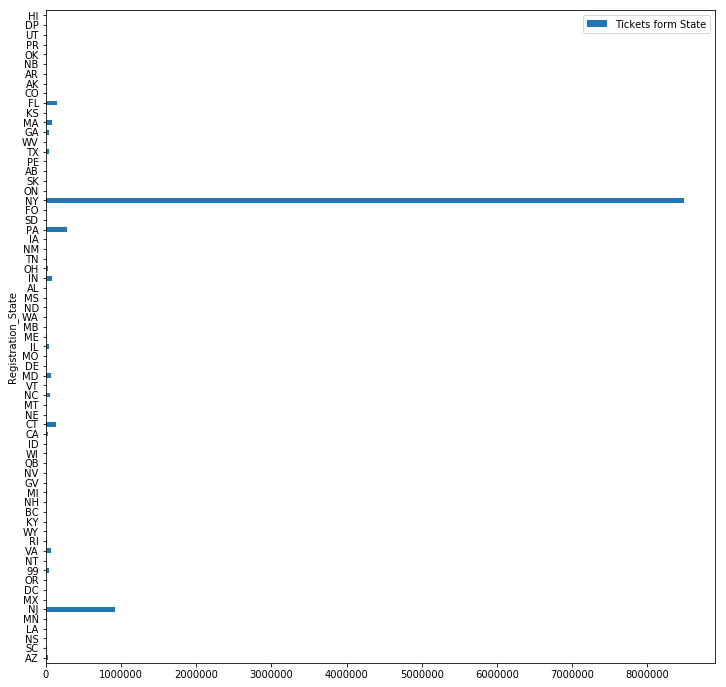

In [23]:
# Visualizing tickets_distribution w.r.t Registration_State
Ticket_Distribution = Spark.sql("SELECT `Registration_State`, count(*) as `Tickets form State` FROM Spark_data_Complete_Table GROUP BY `Registration_State`")
plotdata = Ticket_Distribution.toPandas().set_index('Registration_State').plot.barh(figsize=(12, 12))


In [24]:
# Total number of tickets for each year
Total_Ticket_Per_Year = Spark.sql("select year(Issue_Date) as year, count(Summons_Number) as no_of_tickets from Spark_data_Complete_Table group by year order by year")
Total_Ticket_Per_Year.show(100)

+----+-------------+
|year|no_of_tickets|
+----+-------------+
|1972|            2|
|1973|            2|
|1974|            1|
|1976|            1|
|1977|            1|
|1984|            1|
|1985|            1|
|1990|            2|
|1991|            3|
|1994|            1|
|1996|            1|
|1997|            1|
|2000|          185|
|2001|            2|
|2002|            1|
|2003|            1|
|2004|            2|
|2005|            1|
|2006|            8|
|2007|           18|
|2008|            4|
|2009|            3|
|2010|           48|
|2011|           22|
|2012|           87|
|2013|           70|
|2014|          120|
|2015|          419|
|2016|      5368391|
|2017|      5431918|
|2018|         1057|
|2019|          472|
|2020|           22|
|2021|           22|
|2022|            4|
|2023|            5|
|2024|            3|
|2025|            6|
|2026|           24|
|2027|           50|
|2028|            8|
|2029|            2|
|2030|           12|
|2031|            5|
|2033|       

# Comments ....

--- In there we have get the data from 1972 to 2069 .

--- We will analyse the parking tickets over the year 2017.

In [25]:
# count per year.
Total_Ticket_Per_Year.count()

55

In [26]:
# Filtering only 2017 data
Spark_data.createOrReplaceTempView("tble_view2017")
Spark_data=Spark.sql("select * from tble_view2017 where year(TO_DATE(CAST(UNIX_TIMESTAMP(Issue_Date,'MM/dd/yyyy') AS TIMESTAMP))) = 2017 ")
Spark_data.count()

5431918

In [27]:
#  create a temporary view for Showing distribution
Spark_data.createOrReplaceTempView("tble_view2017")

Distribution_on_years= Spark.sql("SELECT year(Issue_Date) as year,month(Issue_Date) as month,count(*) as Ticket_Frequency FROM tble_view2017 GROUP BY year(Issue_Date),month(Issue_Date) order by Ticket_Frequency desc")
Distribution_on_years.show()

+----+-----+----------------+
|year|month|Ticket_Frequency|
+----+-----+----------------+
|2017|    5|         1020244|
|2017|    3|          964737|
|2017|    4|          888402|
|2017|    1|          877365|
|2017|    6|          852187|
|2017|    2|          826967|
|2017|    7|             370|
|2017|    9|             367|
|2017|   12|             358|
|2017|   11|             338|
|2017|    8|             309|
|2017|   10|             274|
+----+-----+----------------+



From above it show maxm no of violations are in the month of May and observed that from july to December, there is a significant drop in n .

In [28]:
Number_of_Violations_by_month = Distribution_on_years.toPandas()

<Figure size 432x288 with 0 Axes>

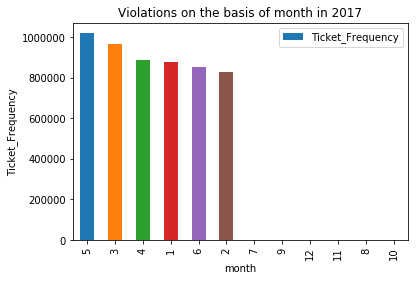

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
Number_of_Violations_by_month.plot(x= 'month', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of month in 2017")
plt.xlabel('month')
plt.ylabel('Ticket_Frequency')
plt.show()

In [30]:
Checking_null_values=Spark.sql("Select count(*) as Number_of_Null_Values from tble_view2017 where Summons_Number is NULL or Plate_ID is NULL or Registration_State is NULL or Issue_Date is NULL or Violation_Code is NULL or Vehicle_Body_Type is NULL or Vehicle_Make is NULL or Violation_Precinct is NULL or Issuer_Precinct is NUll or Violation_Time is NULL ")
Checking_null_values.show()

+---------------------+
|Number_of_Null_Values|
+---------------------+
|                    0|
+---------------------+



In [31]:
#Checking on Plate_ID field to know if there are cases with same plate id.

Plate_Id_Check=Spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from tble_view2017 group by Plate_ID having count(*)>1 order by Ticket_Frequency desc")
Plate_Id_Check.show()

+----------+----------------+
|  Plate_ID|Ticket_Frequency|
+----------+----------------+
|BLANKPLATE|            5261|
|   96089MA|             529|
|   96087MA|             528|
|   94905JA|             527|
|   14828MJ|             526|
|   85848MD|             512|
|   30954JX|             510|
|   2121796|             507|
|   16242TC|             496|
|   2194153|             495|
|   77116MA|             493|
|   47603MD|             492|
|   12359MG|             474|
|   16208TC|             468|
|   49731MA|             464|
|   14829MJ|             460|
|    XEEF98|             458|
|   49331KA|             458|
|   2028685|             454|
|   66103JR|             452|
+----------+----------------+
only showing top 20 rows



### There is one value'BLANKPLATE' which we cannot track. Therefore, we can remove this.

In [32]:
Spark_data=Spark_data[Spark_data.Plate_ID!='BLANKPLATE']
Spark_data.count()

5426657

In [33]:
# Create a temporary view for check createOrReplaceTempView("tble_view2017") .
Spark_data.createOrReplaceTempView("tble_view2017")

In [34]:
# Check the number of which is more than 500 .
Plate_Id_Above_500=Spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from tble_view2017 group by Plate_ID having count(*)>=500 order by Ticket_Frequency desc")
Plate_Id_Above_500.show()

+--------+----------------+
|Plate_ID|Ticket_Frequency|
+--------+----------------+
| 96089MA|             529|
| 96087MA|             528|
| 94905JA|             527|
| 14828MJ|             526|
| 85848MD|             512|
| 30954JX|             510|
| 2121796|             507|
+--------+----------------+



<Figure size 432x288 with 0 Axes>

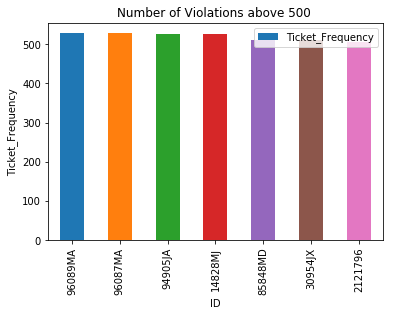

In [35]:
# ploting the graph of violation above 500 .
Number_of_Violations_By_PlateID=Plate_Id_Above_500.toPandas()
plt.clf()
Number_of_Violations_By_PlateID.plot(x= 'Plate_ID', y='Ticket_Frequency', kind='bar')
plt.title("Number of Violations above 500 ")
plt.xlabel('ID')
plt.ylabel('Ticket_Frequency')
plt.show()

#### From above there are 7 id which have more than 500 violations.

# Questions to Be Answered in the Analysis

###### The following analysis should be performed on PySpark mounted on your CoreStack cluster, using the PySpark library. Remember that you need to summarise the analysis with your insights along with the code.

## Examine the data

##### Q1. Find the total number of tickets for the year ?

In [36]:
Ques_1 = Spark.sql("Select count(*),count(distinct(Summons_Number)) from tble_view2017")
Ques_1.show()

+--------+------------------------------+
|count(1)|count(DISTINCT Summons_Number)|
+--------+------------------------------+
| 5426657|                       5426657|
+--------+------------------------------+



#### The number of distinct Summons_Number is equal to total number of rows in data frame. Means there is no duplicates.

#### Q2. Find out the number of unique states from where the cars that got parking tickets came from ?

In [37]:
Ques_2 = Spark.sql("SELECT distinct(Registration_State), Count(*) as Number_of_Records from tble_view2017 group by Registration_State order by Number_of_Records desc")
Ques_2.count()

65

In [38]:
Ques_2.show(500)

+------------------+-----------------+
|Registration_State|Number_of_Records|
+------------------+-----------------+
|                NY|          4273951|
|                NJ|           475825|
|                PA|           140286|
|                CT|            70403|
|                FL|            69468|
|                IN|            45525|
|                MA|            38941|
|                VA|            34367|
|                MD|            30213|
|                NC|            27152|
|                TX|            18827|
|                IL|            18666|
|                GA|            17537|
|                AZ|            12379|
|                OH|            12281|
|                CA|            12153|
|                ME|            10806|
|                99|            10794|
|                SC|            10395|
|                MN|            10083|
|                OK|             9088|
|                TN|             8514|
|                DE|     

#### we have found that there are 65 values of Registration_State.


There is a numeric entry '99' in the column which should be corrected. We need to replace it with the state having maximum entries.As maximum number of tickets are issued in NY, We will replace 99 by NY.

In [39]:
Spark_data = Spark_data.withColumn('Registration_State',when(Spark_data["Registration_State"]=="99",lit('NY')).otherwise(Spark_data["Registration_State"]))

In [40]:
Spark_data.createOrReplaceTempView("tble_view2017")

In [41]:
# Now again Check the number of distinct Registration_State.

Ques_2=Spark.sql("SELECT Registration_State, Count(*) as Ticket_Frequency from tble_view2017 group by Registration_State order by Ticket_Frequency desc")
Ques_2.count()

64

#### In There after replacing 99 to NY we got only 64 distinct values.

In [42]:
# create a temporary veiw to check.
Spark_data.createOrReplaceTempView("tble_view2017")

<Figure size 7200x14400 with 0 Axes>

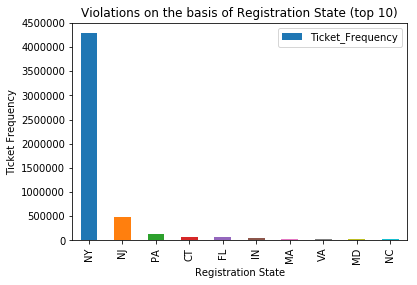

In [43]:
# ploting the graph for violation on the basis of Registration State.
Ques_2 = Ques_2.toPandas()
plt.figure(figsize=(100,200))
Ques_2.head(10).plot(x='Registration_State', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Registration State (top 10)")
plt.xlabel('Registration State')
plt.ylabel('Ticket Frequency')

plt.show()

### Aggregation tasks

#### Q1 - How often does each violation code occur? Display the frequency of the top five violation codes ?

In [44]:
# Check the Violation Code count .

Spark_data.select(countDistinct("Violation_Code")).show()

+------------------------------+
|count(DISTINCT Violation_Code)|
+------------------------------+
|                           100|
+------------------------------+



In [45]:
# check the frequency of each violation code occurs. 
Violation_Code_count = Spark_data.select("Violation_Code")\
.groupBy("Violation_Code")\
.agg(count("Violation_Code")\
.alias("no_of_tickets"))\
.sort(desc("no_of_tickets"))

Violation_Code_count.show(100)

+--------------+-------------+
|Violation_Code|no_of_tickets|
+--------------+-------------+
|            21|       767740|
|            36|       662765|
|            38|       541526|
|            14|       476405|
|            20|       319439|
|            46|       312168|
|            37|       293038|
|            40|       276905|
|            71|       263124|
|             7|       210176|
|            19|       148978|
|            70|       144242|
|            69|        96881|
|            31|        80528|
|            16|        74768|
|            47|        65427|
|            74|        57388|
|            50|        53710|
|             5|        48081|
|            48|        40970|
|            84|        40932|
|            24|        38435|
|            17|        38430|
|            51|        32553|
|            42|        32000|
|             9|        28670|
|            78|        26752|
|            10|        25917|
|            68|        25029|
|       

In [46]:
# Get top 5 from the above .
Ques_4 = Spark.sql("SELECT Violation_Code, Count(*) as Ticket_Frequency from tble_view2017 group by Violation_code order by Ticket_Frequency desc")
Ques_4.show(5)

+--------------+----------------+
|Violation_Code|Ticket_Frequency|
+--------------+----------------+
|            21|          767740|
|            36|          662765|
|            38|          541526|
|            14|          476405|
|            20|          319439|
+--------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

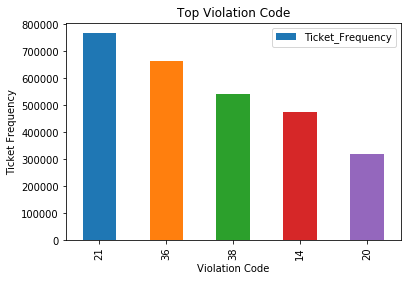

In [47]:
# ploting the graph of top 5 which we get above .
Ques_4_for_plot = Ques_4.toPandas()
plt.clf()
Ques_4_for_plot.head(5).plot(x='Violation_Code', y='Ticket_Frequency', kind='bar')
plt.title("Top Violation Code")
plt.xlabel('Violation Code')
plt.ylabel('Ticket Frequency')
plt.show()

### Q2 How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'?

In [48]:
# check each vachile body type and and ticket frequency .
vehicleBodyType = Spark.sql("SELECT Vehicle_Body_Type, count(*) as Ticket_Frequency from tble_view2017 group by Vehicle_Body_Type order by Ticket_Frequency desc")
vehicleBodyType.show(5)

+-----------------+----------------+
|Vehicle_Body_Type|Ticket_Frequency|
+-----------------+----------------+
|             SUBN|         1882978|
|             4DSD|         1547063|
|              VAN|          723796|
|             DELV|          358924|
|              SDN|          192927|
+-----------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

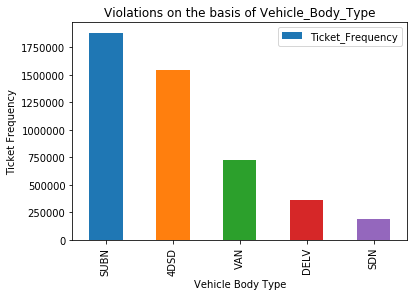

In [49]:
# Plot the graph of vachile body type and and ticket frequency .
vehicleBodyType_for_plot = vehicleBodyType.toPandas()
plt.clf()
vehicleBodyType_for_plot.head(5).plot(x='Vehicle_Body_Type', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicle_Body_Type")
plt.xlabel('Vehicle Body Type')
plt.ylabel('Ticket Frequency')
plt.show()

In [50]:
# Check the vehicle make

vehicleMake = Spark.sql("SELECT Vehicle_Make, count(*) as Ticket_Frequency from tble_view2017 group by Vehicle_Make order by Ticket_Frequency desc")
vehicleMake.show(5)

+------------+----------------+
|Vehicle_Make|Ticket_Frequency|
+------------+----------------+
|        FORD|          636527|
|       TOYOT|          605011|
|       HONDA|          538460|
|       NISSA|          461725|
|       CHEVR|          355868|
+------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

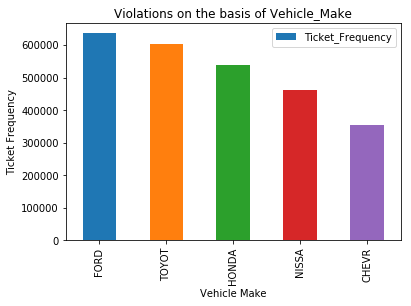

In [51]:
# Plot the graph of vehicle make and Ticket_Frequency .
vehicleMake_for_plot = vehicleMake.toPandas()
plt.clf()
vehicleMake_for_plot.head(5).plot(x='Vehicle_Make', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicle_Make")
plt.xlabel('Vehicle Make')
plt.ylabel('Ticket Frequency')
plt.show()

### Q3 : A precinct is a police station that has a certain zone of the city under its command.Find the (5 highest) frequency of tickets for each of the following:

##### 1.'Violation Precinct' (this is the precinct of the zone where the violation occurred). Using this, can you make any insights for parking violations in any specific areas of the city .

In [52]:
Violation_Precinct = Spark.sql("SELECT Violation_Precinct, count(*) as Ticket_Frequency from tble_view2017 group by Violation_Precinct order by Ticket_Frequency desc")
Violation_Precinct.show(6)

+------------------+----------------+
|Violation_Precinct|Ticket_Frequency|
+------------------+----------------+
|                 0|          925395|
|                19|          274264|
|                14|          203375|
|                 1|          174620|
|                18|          169043|
|               114|          147223|
+------------------+----------------+
only showing top 6 rows



<Figure size 432x288 with 0 Axes>

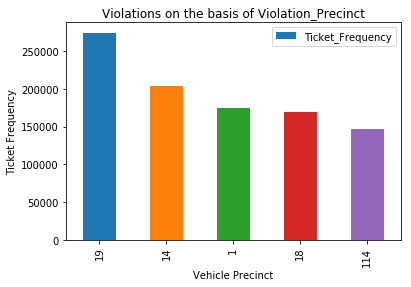

In [53]:
# Plot the diagram on vehicle predict and Ticket Frequency.
Violation_Precinct_for_plot = Violation_Precinct.toPandas()
plt.clf()
Violation_Precinct_for_plot[Violation_Precinct_for_plot.Violation_Precinct!=0].head(5).plot(x='Violation_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Violation_Precinct")
plt.xlabel('Vehicle Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

##### 'Issuer Precinct' (This is the precinct that issued the ticket.)

Here, you would have noticed that the dataframe has the'Violating Precinct' or 'Issuing Precinct' as '0'. These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

In [54]:
Issue_precinct = Spark.sql("SELECT Issuer_Precinct, count(*) as Ticket_Frequency from tble_view2017 group by Issuer_Precinct order by Ticket_Frequency desc")  
Issue_precinct.show(5)

+---------------+----------------+
|Issuer_Precinct|Ticket_Frequency|
+---------------+----------------+
|              0|         1077884|
|             19|          266790|
|             14|          200328|
|              1|          168630|
|             18|          162908|
+---------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

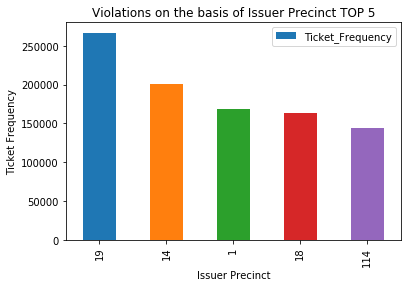

In [55]:
# Plot the diagram between Issuer_Precinct and Ticket_Frequency
Issue_Precinct_for_plot = Issue_precinct.toPandas()
plt.clf()
Issue_Precinct_for_plot[Issue_Precinct_for_plot.Issuer_Precinct!=0].head(5).plot(x='Issuer_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Issuer Precinct TOP 5")
plt.xlabel('Issuer Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

#### Q4. Find the violation code frequency across three precincts which have issued the most number of tickets.Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? Hint: In the SQL view, use the 'where' attribute to filter among three precincts

##### 4.1 Finding violation code frequency

In [56]:
violation_code_freq = Spark.sql("select Issuer_Precinct,Violation_Code, count(*) as Frequency from tble_view2017 group by Issuer_Precinct, Violation_Code order by Frequency desc" )
violation_code_freq.show(7)

+---------------+--------------+---------+
|Issuer_Precinct|Violation_Code|Frequency|
+---------------+--------------+---------+
|              0|            36|   662765|
|              0|             7|   210175|
|              0|            21|   125923|
|             18|            14|    50135|
|             19|            46|    48422|
|              0|             5|    48076|
|             14|            14|    45019|
+---------------+--------------+---------+
only showing top 7 rows



##### We are not considering 0. Therefore 18,19,14 are the three issuer precincts with maximum number of violations.

In [57]:
# Check issuer precinct one by one. 
# check issuer precinct 18 here
violation_code_freq_18 = Spark.sql("select Violation_Code, count(*) as Frequency from tble_view2017 where Issuer_Precinct=18 group by Violation_Code order by Frequency desc" )
violation_code_freq_18.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    50135|
|            69|    20188|
|            47|    14105|
|            31|    11887|
|            46|     7861|
|            42|     6189|
|            38|     6157|
|            84|     5188|
|            19|     4580|
|            20|     4109|
+--------------+---------+
only showing top 10 rows



In [58]:
# check issuer precinct 19 here
violation_code_freq_19 = Spark.sql("select Violation_Code, count(*) as Frequency from tble_view2017 where Issuer_Precinct=19 group by Violation_Code order by Frequency desc" )
violation_code_freq_19.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|    48422|
|            38|    36332|
|            37|    36046|
|            14|    29791|
|            21|    28409|
|            20|    14624|
|            40|    11408|
|            16|     9921|
|            71|     7489|
|            19|     6854|
+--------------+---------+
only showing top 10 rows



In [59]:
# check issuer precinct 14 here
violation_code_freq_14 = Spark.sql("select Violation_Code, count(*) as Frequency from tble_view2017 where Issuer_Precinct=14 group by Violation_Code order by Frequency desc" )
violation_code_freq_14.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    45019|
|            69|    30453|
|            31|    22528|
|            47|    18357|
|            42|    10022|
|            46|     7675|
|            19|     7031|
|            84|     6739|
|            82|     5052|
|            40|     3581|
+--------------+---------+
only showing top 10 rows



#### 4.2 Common codes across precincts

In [60]:
common_codes =Spark.sql("select Violation_Code, count(*) as Frequency from tble_view2017 where Issuer_Precinct in (18,19,14) group by Violation_Code order by Frequency desc")
common_codes.show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|   124945|
|            46|    63958|
|            69|    53549|
|            38|    45721|
|            37|    39537|
+--------------+---------+
only showing top 5 rows



#### Comments ,
In Precinct 18 and precinct 14 has more less similar top violation code.And In precinct 19 has very different top violation code .

### Q5.Find out the properties of parking violations across different times of the day

 1. -> Find a way to deal with missing values, if any. (Hint: Check for the null values using 'isNull' under the SQL. Also, to remove the null values, check the 'dropna' command in the API documentation.)
 
 2. -> The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.
 
 3. -> Divide 24 hours into six equal discrete bins of time. Choose the intervals as you see fit. For each of these groups, find the three most commonly occurring violations. (Hint: Use the CASE-WHEN in SQL view to segregate into bins. To find the most commonly occurring violations, you can use an approach similar to the one mentioned in the hint for question 4.)
 
 4. -> Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

In [61]:
# Find the number of missing values .
null_vltime_2017 = Spark.sql("SELECT count(*) as No_of_Count_Values from tble_view2017 WHERE Violation_Time is NULL")
null_vltime_2017.show()

+------------------+
|No_of_Count_Values|
+------------------+
|                 0|
+------------------+



In [62]:
# If any null value than check the col

Spark_data.where(col("Violation_Time").isNull()).show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



In [63]:
Spark_data.select('Violation_Time').show()

+--------------+
|Violation_Time|
+--------------+
|         0710A|
|         0826A|
|         0133P|
|         1220P|
|         0321P|
|         1025A|
|         1130A|
|         0125P|
|         0114P|
|         0843A|
|         0424P|
|         0848A|
|         0839A|
|         0819P|
|         1226P|
|         0750A|
|         0413P|
|         0620P|
|         0553A|
|         1142A|
+--------------+
only showing top 20 rows



In [64]:
# Divide 24 hours into six equal parts.
bins=Spark.sql("SELECT Summons_Number, Violation_Code , Violation_Time, Issuer_Precinct, case when substring(Violation_Time,1,2) in ('00','01','02','03','12') and upper(substring(Violation_Time,-1))='A' then 1 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='A' then 2 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='A' then 3 when substring(Violation_Time,1,2) in ('12','00','01','02','03') and upper(substring(Violation_Time,-1))='P' then 4 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='P' then 5 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='P' then 6 else null end as Violation_Time_bin from tble_view2017 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
bins.show()

+--------------+--------------+--------------+---------------+------------------+
|Summons_Number|Violation_Code|Violation_Time|Issuer_Precinct|Violation_Time_bin|
+--------------+--------------+--------------+---------------+------------------+
|    8357020756|            21|         0136A|            113|                 1|
|    7036629370|            21|         1106A|            104|                 3|
|    8511110940|            19|         1101A|             33|                 3|
|    4630265570|            36|         1232P|              0|                 4|
|    8531010731|            21|         1152A|             40|                 3|
|    8484879719|            14|         0813A|             14|                 3|
|    8431043428|            71|         0412P|             26|                 5|
|    8518306905|            84|         0355P|             30|                 4|
|    8525217852|            21|         0938A|             44|                 3|
|    8501400233|

In [65]:
bins.createOrReplaceTempView("bins_tbl")

In [66]:
# Count the violation_code_time_count.
violation_code_time_count = Spark.sql("SELECT Violation_Code,Violation_Time_bin, count(*) count from bins_tbl group by Violation_Code,Violation_Time_bin")
violation_code_time_count.show()

+--------------+------------------+------+
|Violation_Code|Violation_Time_bin| count|
+--------------+------------------+------+
|            71|                 4|103156|
|            92|                 2|     1|
|            10|                 2|  3164|
|            48|                 6|   620|
|            41|                 3|   950|
|            23|                 6|   691|
|            62|                 1|   278|
|            69|                 1|     1|
|            16|                 3| 28163|
|            17|                 1|   995|
|            17|                 2|  4277|
|            83|                 6|   251|
|            91|                 6|    33|
|            34|                 5|     1|
|            73|                 4|   738|
|            45|                 4|  1223|
|            79|                 1|    21|
|            58|                 1|     3|
|            80|                 3|   887|
|             6|                 1|    86|
+----------

In [67]:
# Check bin_1 
bin_1 = Spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 1 group by Violation_Code order by Vio_cnt desc")
bin_1.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21|  36934|
|            40|  25810|
|            78|  15513|
+--------------+-------+
only showing top 3 rows



In [68]:
# Check bin_2
bin_2 = Spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 2 group by Violation_Code order by Vio_cnt desc")
bin_2.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            14|  74095|
|            40|  60609|
|            21|  57876|
+--------------+-------+
only showing top 3 rows



In [69]:
# Check bin_3 .
bin_3 = Spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 3 group by Violation_Code order by Vio_cnt desc")
bin_3.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21| 597827|
|            36| 348165|
|            38| 176310|
+--------------+-------+
only showing top 3 rows



In [70]:
# Check bin_4 .
bin_4 = Spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 4 group by Violation_Code order by Vio_cnt desc")
bin_4.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            36| 286284|
|            38| 240511|
|            37| 166969|
+--------------+-------+
only showing top 3 rows



In [71]:
# Check bin_5 .
bin_5 = Spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 5 group by Violation_Code order by Vio_cnt desc")
bin_5.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            38| 102784|
|            14|  75856|
|            37|  70317|
+--------------+-------+
only showing top 3 rows



In [72]:
# Check bin_6 .
bin_6 = Spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 6 group by Violation_Code order by Vio_cnt desc")
bin_6.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|             7|  26293|
|            40|  22301|
|            14|  21026|
+--------------+-------+
only showing top 3 rows



#### Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in     terms of the bins from the previous part).

In [73]:
Checked_time_bin = Spark.sql("select Violation_Time_bin, count(*) Vio_count from bins_tbl where Violation_Code in (21, 36, 38) group by Violation_Time_bin order by Vio_count desc")
Checked_time_bin.show(3)

+------------------+---------+
|Violation_Time_bin|Vio_count|
+------------------+---------+
|                 3|  1122302|
|                 4|   601432|
|                 5|   116574|
+------------------+---------+
only showing top 3 rows



#### From The above bins 3, 4, 5 are having most violations

The obvious reason could be, In day time significantly more vehicles were running and hence more violations . 

## Q6.Let’s try and find some seasonality in this data:

#### 1. First, divide the year into some number of seasons,and find frequencies of tickets for each season

In [74]:
tickets_seasonality = Spark.sql("select Violation_Code , Issuer_Precinct, case when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 03 and 05 then 'spring' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 06 and 08 then 'summer' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 09 and 11 then 'autumn' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) in (1,2,12) then 'winter' else 'unknown' end  as season from tble_view2017")
tickets_seasonality.show()

+--------------+---------------+------+
|Violation_Code|Issuer_Precinct|season|
+--------------+---------------+------+
|            70|             19|winter|
|            40|            108|spring|
|            14|             25|winter|
|            20|            100|summer|
|            62|            108|winter|
|            36|              0|spring|
|            46|             33|spring|
|            21|              0|winter|
|            36|              0|summer|
|            37|             84|winter|
|            14|             46|winter|
|             7|              0|spring|
|            40|             43|summer|
|            36|              0|spring|
|            38|             70|winter|
|            20|            114|spring|
|            21|            109|spring|
|             7|              0|spring|
|            70|            104|spring|
|            37|             88|spring|
+--------------+---------------+------+
only showing top 20 rows



### Season Binning Details
###### Season     Month _interval
       spring   march, april,may
       summer   june, july, August
       autumn   September, October, November
       wuinter  December, january, February

In [75]:
# Check tickets_seasonality_tbl.
tickets_seasonality.createOrReplaceTempView("tickets_seasonality_tbl")

In [76]:
tickets_seasonality_freq = Spark.sql("select season, count(*) as no_of_tickets from tickets_seasonality_tbl group by 1 order by 2 desc")
tickets_seasonality_freq.show()

+------+-------------+
|season|no_of_tickets|
+------+-------------+
|spring|      2870491|
|winter|      1702786|
|summer|       852405|
|autumn|          975|
+------+-------------+



In [77]:
# For spring season check violation_in_spring.
violation_in_spring = Spark.sql("select Violation_Code, count(*) as Frequency from tickets_seasonality_tbl where Issuer_Precinct in (19, 14, 1) and season = 'spring' group by Violation_Code order by Frequency desc" )
violation_in_spring.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    61633|
|            46|    37732|
|            38|    25511|
+--------------+---------+
only showing top 3 rows



In [78]:
# For winter season check violation_in_winter.
violation_in_winter = Spark.sql("select Violation_Code, count(*) as Frequency from tickets_seasonality_tbl where Issuer_Precinct in (19, 14, 1) and season = 'winter' group by Violation_Code order by Frequency desc" )
violation_in_winter.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    32824|
|            46|    20148|
|            38|    14885|
+--------------+---------+
only showing top 3 rows



In [79]:
# For summer season check violation_in_summer .
violation_in_summer = Spark.sql("select Violation_Code, count(*) as Frequency from tickets_seasonality_tbl where Issuer_Precinct in (19, 14, 1) and season = 'summer' group by Violation_Code order by Frequency desc" )
violation_in_summer.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    18689|
|            46|    10945|
|            20|    10393|
+--------------+---------+
only showing top 3 rows



In [80]:
# For summer season check violation_in_summer .
violation_in_autumn = Spark.sql("select Violation_Code, count(*) as Frequency from tickets_seasonality_tbl where Issuer_Precinct in (19, 14, 1) and season = 'autumn' group by Violation_Code order by Frequency desc" )
violation_in_autumn.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|       15|
|            14|        9|
|            78|        3|
+--------------+---------+
only showing top 3 rows



## Q7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

#### 1. Find total occurrences of the three most common violation codes ?

In [81]:
common_Violation = Spark.sql("select Violation_Code, count(*) as Frequency from tble_view2017 group by Violation_Code order by Frequency desc")
common_Violation.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            21|   767740|
|            36|   662765|
|            38|   541526|
+--------------+---------+
only showing top 3 rows



#### 2. Using this information, find the total amount collected for the three violation codes with maximum tickets. State the code which has the highest total collection.

In [82]:
common_Violation_fine=common_Violation.withColumn("fine",when(common_Violation.Violation_Code == 21, (common_Violation.Frequency) *55).otherwise((common_Violation.Frequency)*50))
common_Violation_fine.show(3)
print('Total collection = ',767740*55+662765*50+541526*50)

+--------------+---------+--------+
|Violation_Code|Frequency|    fine|
+--------------+---------+--------+
|            21|   767740|42225700|
|            36|   662765|33138250|
|            38|   541526|27076300|
+--------------+---------+--------+
only showing top 3 rows

Total collection =  102440250


##### code with 21 had the highest collection.

#### c).What can you intuitively infer from these findings?

 IN Jan to June had the major violation & July to Dec has a drastic drop. Highest violation &collection was by Code-21(No parking where parking is not allowed by sign, street marking or traffic control device.)